In [1]:
import sys
sys.path.insert(0, "./data/")

In [37]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier

from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier

from sklearn.metrics import confusion_matrix, precision_score, recall_score

import roc
from roc import plot_roc

In [3]:
churn_raw = pd.read_csv("./data/churn.csv")

In [4]:
churn_raw.head()

,avg_dist,avg_rating_by_driver,avg_rating_of_driver,avg_surge,city,last_trip_date,phone,signup_date,surge_pct,trips_in_first_30_days,luxury_car_user,weekday_pct
0,3.67,5.0,4.7,1.10,King's Landing,2014-06-17,iPhone,2014-01-25,15.4,4,True,46.2
1,8.26,5.0,5.0,1.00,Astapor,2014-05-05,Android,2014-01-29,0.0,0,False,50.0
2,0.77,5.0,4.3,1.00,Astapor,2014-01-07,iPhone,2014-01-06,0.0,3,False,100.0
3,2.36,4.9,4.6,1.14,King's Landing,2014-06-29,iPhone,2014-01-10,20.0,9,True,80.0
4,3.13,4.9,4.4,1.19,Winterfell,2014-03-15,Android,2014-01-27,11.8,14,False,82.4


In [5]:
churn_raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 12 columns):
avg_dist                  50000 non-null float64
avg_rating_by_driver      49799 non-null float64
avg_rating_of_driver      41878 non-null float64
avg_surge                 50000 non-null float64
city                      50000 non-null object
last_trip_date            50000 non-null object
phone                     49604 non-null object
signup_date               50000 non-null object
surge_pct                 50000 non-null float64
trips_in_first_30_days    50000 non-null int64
luxury_car_user           50000 non-null bool
weekday_pct               50000 non-null float64
dtypes: bool(1), float64(6), int64(1), object(4)
memory usage: 4.2+ MB


In [6]:
churn_raw.isnull().any()

avg_dist                  False
avg_rating_by_driver       True
avg_rating_of_driver       True
avg_surge                 False
city                      False
last_trip_date            False
phone                      True
signup_date               False
surge_pct                 False
trips_in_first_30_days    False
luxury_car_user           False
weekday_pct               False
dtype: bool

In [7]:
churn_raw.columns

Index(['avg_dist', 'avg_rating_by_driver', 'avg_rating_of_driver', 'avg_surge',
       'city', 'last_trip_date', 'phone', 'signup_date', 'surge_pct',
       'trips_in_first_30_days', 'luxury_car_user', 'weekday_pct'],
      dtype='object')

# Find y - 'active_flag',  active(=1) or not(=0)

In [8]:
from datetime import datetime
def active_flag(df, last_trip_date_columns):
    # calucate preceding data
    df['pulled_data'] = datetime.strptime('2014-7-1', "%Y-%m-%d") # temp pulled_data columns
    df['preceding_data'] = df['pulled_data'] - pd.to_datetime(df[last_trip_date_columns])
    df['preceding_data'] = df['preceding_data'].astype(str).str[:-24].astype(int)
    
    
    # if active or not
    df['active_flag'] = np.where(df['preceding_data'] <= 30, 1, 0)
    
    # drop temp columns
    df.drop('pulled_data',axis=1)

# use the function
active_flag(churn_raw,'last_trip_date')
churn_raw.head()

,avg_dist,avg_rating_by_driver,avg_rating_of_driver,avg_surge,city,last_trip_date,phone,signup_date,surge_pct,trips_in_first_30_days,luxury_car_user,weekday_pct,pulled_data,preceding_data,active_flag
0,3.67,5.0,4.7,1.10,King's Landing,2014-06-17,iPhone,2014-01-25,15.4,4,True,46.2,2014-07-01,14,1
1,8.26,5.0,5.0,1.00,Astapor,2014-05-05,Android,2014-01-29,0.0,0,False,50.0,2014-07-01,57,0
2,0.77,5.0,4.3,1.00,Astapor,2014-01-07,iPhone,2014-01-06,0.0,3,False,100.0,2014-07-01,175,0
3,2.36,4.9,4.6,1.14,King's Landing,2014-06-29,iPhone,2014-01-10,20.0,9,True,80.0,2014-07-01,2,1
4,3.13,4.9,4.4,1.19,Winterfell,2014-03-15,Android,2014-01-27,11.8,14,False,82.4,2014-07-01,108,0


In [10]:
churn=churn_raw.copy()
churn.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 15 columns):
avg_dist                  50000 non-null float64
avg_rating_by_driver      49799 non-null float64
avg_rating_of_driver      41878 non-null float64
avg_surge                 50000 non-null float64
city                      50000 non-null object
last_trip_date            50000 non-null object
phone                     49604 non-null object
signup_date               50000 non-null object
surge_pct                 50000 non-null float64
trips_in_first_30_days    50000 non-null int64
luxury_car_user           50000 non-null bool
weekday_pct               50000 non-null float64
pulled_data               50000 non-null datetime64[ns]
preceding_data            50000 non-null int64
active_flag               50000 non-null int64
dtypes: bool(1), datetime64[ns](1), float64(6), int64(3), object(4)
memory usage: 5.4+ MB


In [11]:
churn.describe()

,avg_dist,avg_rating_by_driver,avg_rating_of_driver,avg_surge,surge_pct,trips_in_first_30_days,weekday_pct,preceding_data,active_flag
count,50000.000000,49799.000000,41878.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000
mean,5.796827,4.778158,4.601559,1.074764,8.849536,2.278200,60.926084,72.665220,0.376080
std,5.707357,0.446652,0.617338,0.222336,19.958811,3.792684,37.081503,61.718985,0.484405
min,0.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2.420000,4.700000,4.300000,1.000000,0.000000,0.000000,33.300000,13.000000,0.000000
50%,3.880000,5.000000,4.900000,1.000000,0.000000,1.000000,66.700000,54.000000,0.000000
75%,6.940000,5.000000,5.000000,1.050000,8.600000,3.000000,100.000000,137.000000,1.000000
max,160.960000,5.000000,5.000000,8.000000,100.000000,125.000000,100.000000,181.000000,1.000000


In [12]:
churn.head()

,avg_dist,avg_rating_by_driver,avg_rating_of_driver,avg_surge,city,last_trip_date,phone,signup_date,surge_pct,trips_in_first_30_days,luxury_car_user,weekday_pct,pulled_data,preceding_data,active_flag
0,3.67,5.0,4.7,1.10,King's Landing,2014-06-17,iPhone,2014-01-25,15.4,4,True,46.2,2014-07-01,14,1
1,8.26,5.0,5.0,1.00,Astapor,2014-05-05,Android,2014-01-29,0.0,0,False,50.0,2014-07-01,57,0
2,0.77,5.0,4.3,1.00,Astapor,2014-01-07,iPhone,2014-01-06,0.0,3,False,100.0,2014-07-01,175,0
3,2.36,4.9,4.6,1.14,King's Landing,2014-06-29,iPhone,2014-01-10,20.0,9,True,80.0,2014-07-01,2,1
4,3.13,4.9,4.4,1.19,Winterfell,2014-03-15,Android,2014-01-27,11.8,14,False,82.4,2014-07-01,108,0


# EDA

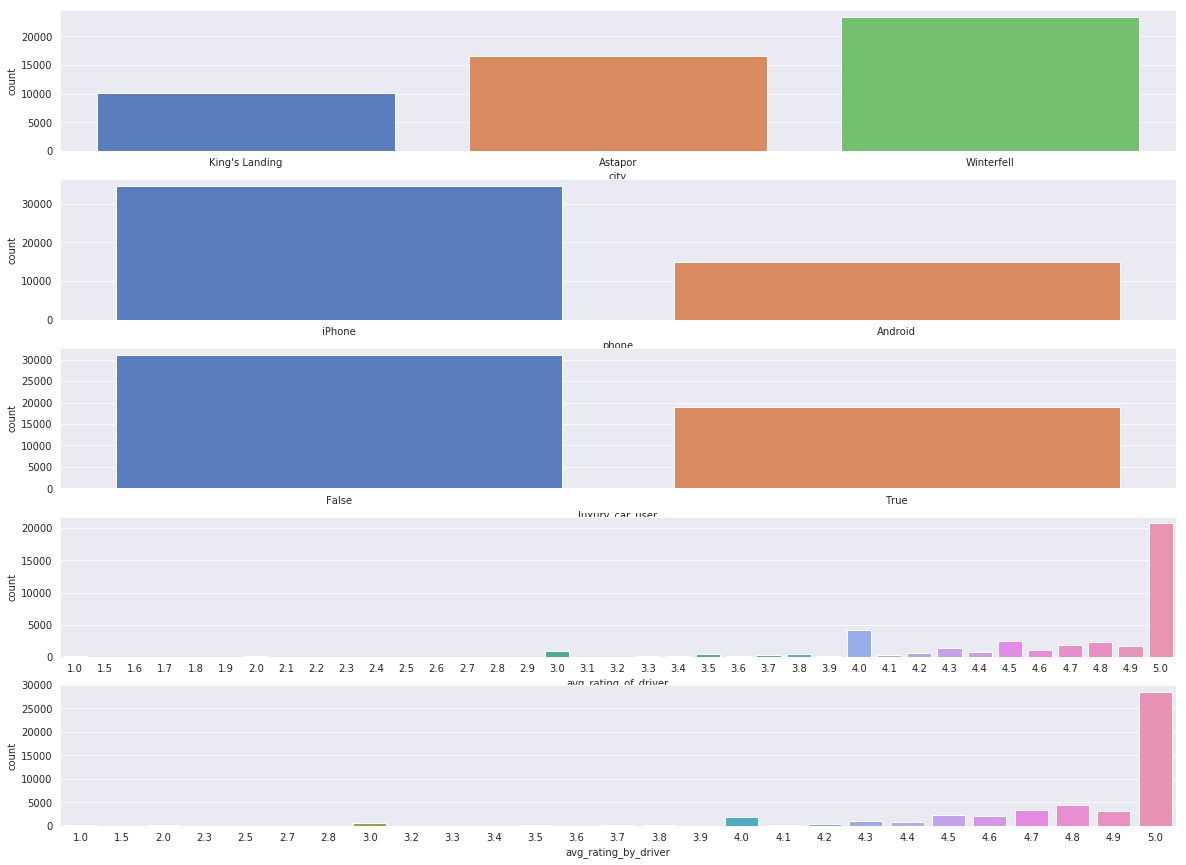

In [20]:
import seaborn as sns
sns.set_style('darkgrid')
sns.set_palette('muted')

fig, axs = plt.subplots(5, 1, figsize = (20,15))
sns.countplot(x = 'city',data = churn, ax=axs[0])
sns.countplot(x = 'phone', data = churn, ax=axs[1])
sns.countplot(x = 'luxury_car_user',data = churn, ax=axs[2])
sns.countplot(x = 'avg_rating_of_driver',data = churn, ax=axs[3])
sns.countplot(x = 'avg_rating_by_driver',data = churn, ax=axs[4])

In [15]:
churn.city.value_counts(), churn.city.size

(Winterfell        23336
 Astapor           16534
 King's Landing    10130
 Name: city, dtype: int64, 50000)

In [16]:
churn.luxury_car_user.value_counts() # 5000

False    31146
True     18854
Name: luxury_car_user, dtype: int64

In [96]:
churn.groupby(['city','active_flag']).count()

avg_dist  avg_rating_by_driver  \
city           active_flag                                   
Astapor        0               12306                 12251   
               1                4228                  4225   
King's Landing 0                3767                  3751   
               1                6363                  6339   
Winterfell     0               15123                 15029   
               1                8213                  8204   

                            avg_rating_of_driver  avg_surge  last_trip_date  \
city           active_flag                                                    
Astapor        0                            9790      12306           12306   
               1                            3857       4228            4228   
King's Landing 0                            3066       3767            3767   
               1                            5781       6363            6363   
Winterfell     0                           11850      15123           15123   
               1                            7534       8213            8213   

                            phone  signup_date  surge_pct  \
city           active_flag                                  
Astapor        0            12215        12306      12306   
               1             4198         4228       4228   
King's Landing 0             3741         3767       3767   
               1             6325         6363       6363   
Winterfell     0            14977        15123      15123   
               1             8148         8213       8213   

                            trips_in_first_30_days  luxury_car_user  \
city           active_flag                                            
Astapor        0                             12306            12306   
               1                              4228             4228   
King's Landing 0                              3767             3767   
               1                              6363             6363   
Winterfell     0                             15123            15123   
               1                              8213             8213   

                            weekday_pct  pulled_data  preceding_data  
city           active_flag                                            
Astapor        0                  12306        12306           12306  
               1                   4228         4228            4228  
King's Landing 0                   3767         3767            3767  
               1                   6363         6363            6363  
Winterfell     0                  15123        15123           15123  
               1                   8213         8213            8213

In [98]:
churn.groupby(['luxury_car_user','active_flag']).count()

avg_dist  avg_rating_by_driver  \
luxury_car_user active_flag                                   
False           0               21839                 21696   
                1                9307                  9283   
True            0                9357                  9335   
                1                9497                  9485   

                             avg_rating_of_driver  avg_surge   city  \
luxury_car_user active_flag                                           
False           0                           17371      21839  21839   
                1                            8388       9307   9307   
True            0                            7335       9357   9357   
                1                            8784       9497   9497   

                             last_trip_date  phone  signup_date  surge_pct  \
luxury_car_user active_flag                                                  
False           0                     21839  21731        21839      21839   
                1                      9307   9261         9307       9307   
True            0                      9357   9202         9357       9357   
                1                      9497   9410         9497       9497   

                             trips_in_first_30_days  weekday_pct  pulled_data  \
luxury_car_user active_flag                                                     
False           0                             21839        21839        21839   
                1                              9307         9307         9307   
True            0                              9357         9357         9357   
                1                              9497         9497         9497   

                             preceding_data  
luxury_car_user active_flag                  
False           0                     21839  
                1                      9307  
True            0                      9357  
                1                      9497

In [35]:
# plt.scatter(churn.luxury_car_user, churn.active_flag)

# clean data

In [112]:
# creat signup_period - how long be user

def signup_period(df, signup_date):
    # calucate preceding data
    df['signup_period'] = df['pulled_data'] - pd.to_datetime(df[signup_date])
    df['signup_period'] = df['signup_period'].astype(str).str[:-24].astype(int)

# use the function
signup_period(churn_raw,'signup_date')
churn_raw.head()

,avg_dist,avg_rating_by_driver,avg_rating_of_driver,avg_surge,city,last_trip_date,phone,signup_date,surge_pct,trips_in_first_30_days,luxury_car_user,weekday_pct,pulled_data,preceding_data,active_flag,signup_period
0,3.67,5.0,4.7,1.10,King's Landing,2014-06-17,iPhone,2014-01-25,15.4,4,True,46.2,2014-07-01,14,1,157
1,8.26,5.0,5.0,1.00,Astapor,2014-05-05,Android,2014-01-29,0.0,0,False,50.0,2014-07-01,57,0,153
2,0.77,5.0,4.3,1.00,Astapor,2014-01-07,iPhone,2014-01-06,0.0,3,False,100.0,2014-07-01,175,0,176
3,2.36,4.9,4.6,1.14,King's Landing,2014-06-29,iPhone,2014-01-10,20.0,9,True,80.0,2014-07-01,2,1,172
4,3.13,4.9,4.4,1.19,Winterfell,2014-03-15,Android,2014-01-27,11.8,14,False,82.4,2014-07-01,108,0,155


In [132]:
min(churn_raw.signup_period), max(churn_raw.signup_period)

(151, 181)

In [134]:
# drop drop columns
def drop_data(df, drop_columns, axis=1):
    return df.drop(drop_columns,axis)

drop_columns = ['pulled_data', 'last_trip_date','signup_date','phone']
churn_raw = drop_data(churn_raw,drop_columns)

In [139]:
#King's Landing -1 , Astapor -2, Winterfell-3
churn_raw.replace("King's Landing", 1, inplace=True)
churn_raw.replace("Astapor", 2, inplace=True)
churn_raw.replace("Winterfell", 3, inplace=True)

In [140]:
churn_raw.head()

,avg_dist,avg_rating_by_driver,avg_rating_of_driver,avg_surge,city,surge_pct,trips_in_first_30_days,luxury_car_user,weekday_pct,preceding_data,active_flag,signup_period
0,3.67,5.0,4.7,1.10,1,15.4,4,True,46.2,14,1,157
1,8.26,5.0,5.0,1.00,2,0.0,0,False,50.0,57,0,153
2,0.77,5.0,4.3,1.00,2,0.0,3,False,100.0,175,0,176
3,2.36,4.9,4.6,1.14,1,20.0,9,True,80.0,2,1,172
4,3.13,4.9,4.4,1.19,3,11.8,14,False,82.4,108,0,155


# Final cleaned dataset

In [142]:
# Final cleaned dataset
churn = churn_raw.copy()
churn.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 12 columns):
avg_dist                  50000 non-null float64
avg_rating_by_driver      49799 non-null float64
avg_rating_of_driver      41878 non-null float64
avg_surge                 50000 non-null float64
city                      50000 non-null int64
surge_pct                 50000 non-null float64
trips_in_first_30_days    50000 non-null int64
luxury_car_user           50000 non-null bool
weekday_pct               50000 non-null float64
preceding_data            50000 non-null int64
active_flag               50000 non-null int64
signup_period             50000 non-null int64
dtypes: bool(1), float64(6), int64(5)
memory usage: 4.2 MB


In [151]:
# True or False to 1 or 0
churn= churn.fillna(churn.mean())
churn.head()

,avg_dist,avg_rating_by_driver,avg_rating_of_driver,avg_surge,city,surge_pct,trips_in_first_30_days,luxury_car_user,weekday_pct,preceding_data,active_flag,signup_period
0,3.67,5.0,4.7,1.10,1,15.4,4,True,46.2,14,1,157
1,8.26,5.0,5.0,1.00,2,0.0,0,False,50.0,57,0,153
2,0.77,5.0,4.3,1.00,2,0.0,3,False,100.0,175,0,176
3,2.36,4.9,4.6,1.14,1,20.0,9,True,80.0,2,1,172
4,3.13,4.9,4.4,1.19,3,11.8,14,False,82.4,108,0,155


In [152]:
churn.isnull().any()

avg_dist                  False
avg_rating_by_driver      False
avg_rating_of_driver      False
avg_surge                 False
city                      False
surge_pct                 False
trips_in_first_30_days    False
luxury_car_user           False
weekday_pct               False
preceding_data            False
active_flag               False
signup_period             False
dtype: bool

# Create model

In [157]:
from sklearn.model_selection import train_test_split
data = churn.copy()
y = data.active_flag
X = data.replace(True, 1)
X = data.replace(False, 0)

In [158]:
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier as RF
from sklearn.neighbors import KNeighborsClassifier as KNN

In [159]:
# Predictive model establishment
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

def run_cv(X_train, X_test, y_train, y_test, clf_class,**kwargs):
    clf=clf_class(**kwargs)
    clf.fit(X_train,y_train)
    y_pred = clf.predict(X_test)
    return y_pred

In [160]:
# accuracy evaluation
def accuracy(y_true,y_pred):
    return np.mean(y_true==y_pred)

In [ ]:
print("Support vector machines:")
print("%.3f"%accuracy(y_test,run_cv(X_train, X_test, y_train, y_test, SVC)))
print("Random forest:")
print("%.3f"%accuracy(y_test,run_cv(X_train, X_test, y_train, y_test, RF)))
print("K-nearest-neighbors")
print("%.3f"%accuracy(y_test,run_cv(X_train, X_test, y_train, y_test, KNN)))

Support vector machines:


/home/lulu/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


In [67]:
# TFPN评估法
def TFPN(y_true,y_pred):
    Pall=y[y_true==1]
    Nall=y[y_true==0]
    TP=pd.Series(np.sum((y_true==1)&(y_pred==1))/len(Pall))
    FP=pd.Series(np.sum((y_true==1)&(y_pred==0))/len(Pall))
    TN=pd.Series(np.sum((y_true==0)&(y_pred==0))/len(Nall))
    FN=pd.Series(np.sum((y_true==0)&(y_pred==1))/len(Nall))
    AC=pd.Series(np.mean(y_true==y_pred))
    tfpn=pd.concat([TP,FP,TN,FN,AC],axis=1)
    tfpn.columns=['TP','FP','TN','FN','AC']
    return tfpn

In [68]:
print("Support vector machines:")
print(TFPN(y,run_cv(X,y,SVC)))
print("Random forest:")
print(TFPN(y,run_cv(X,y,RF)))
print("K-nearest-neighbors")
print(TFPN(y,run_cv(X,y,KNN)))

Support vector machines:


TypeError: 'KFold' object is not iterable

In [ ]:
Receiver Operating Characteristic (ROC) curves are a data scientist's best friend and are always on top of their toolbox

In [ ]:
离散型数据可分为两种: 一种是定序, 一种是定类.

1) 定序

薪资水平其含有顺序意义, 因此将其字符型转化为数值型
df['salary'] = df.salary.map({"low": 0, "medium": 1, "high": 2})
df.salary.unique()

2) 定类

岗位是定类型变量, 对其进行one-hot编码, 这里直接利用pandas的get_dummies方法.

df_one_hot = pd.get_dummies(df, prefix="dep")
df_one_hot.shape

2. 连续型数据处理

逻辑回归模型能够适应连续型变量, 因此可以不用进行离散化处理, 又由于多个特征之间差异差异较大会造成梯度下降算法收敛速度变慢, 故进行归一化处理
#采用max-min归一化方法
hours = df_one_hot['hours']
df_one_hot['hours'] = df_one_hot.hours.apply(lambda x: (x-hours.min()) / (hours.max()-hours.min()))

In [ ]:
两个变量均是连续型且具有线性关系, 则可以使用皮尔逊相关系数, 否则使用斯皮尔曼相关系数, 这里采用斯皮尔曼相关系数
#计算相关系数
correlation = df_one_hot.corr(method = "spearman")
plt.figure(figsize=(18, 10))
#绘制热力图
sns.heatmap(correlation, linewidths=0.2, vmax=1, vmin=-1, linecolor='w',fmt='.2f',
            annot=True,annot_kws={'size':10},square=True)